In [1]:
pip install pandas_ta

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cbpro

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install dataclasses

Note: you may need to restart the kernel to use updated packages.


In [4]:
import json

In [5]:
import pandas_ta as ta

In [6]:
import cbpro

In [7]:
import pandas as pd

In [9]:
import matplotlib.pyplot as plt

In [10]:
public_client = cbpro.PublicClient() #opens a client to query PUBLIC coinbase api

In [17]:
df = pd.read_json(json.dumps(public_client.get_product_historic_rates('BTC-USD', granularity=900))) #Granularity choices: 60 (minute), 300 (5 minutes), 900 (15 mintes), 3600 (1 hour), 21600 (6 hours), 86400 (1 day)

In [12]:
df.columns = ['time', 'low', 'high', 'open', 'close', 'volume'] #label columns
df_time = df["time"]
df_low = df["low"]
df_high = df["high"]
df_open = df["open"]
df_close = df["close"]
df_volume = df["volume"]

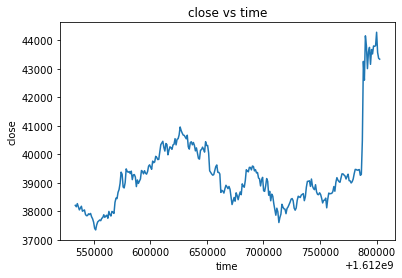

In [13]:
plt.plot(df_time, df_close)
plt.title("close vs time")
plt.xlabel("time")
plt.ylabel("close")
plt.show()

In [14]:
rsi = ta.rsi(df["close"], 14)
sma50 = ta.sma(df["close"], 50)

<function matplotlib.pyplot.show(close=None, block=None)>

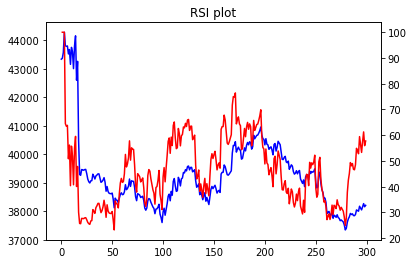

In [15]:
df1 = df["close"]
df2 = rsi

fig, ax1 = plt.subplots()
ax1.plot(df1, 'b-')
ax2 = ax1.twinx()
ax2.plot(df2, 'r-')
plt.title("RSI plot")
plt.show

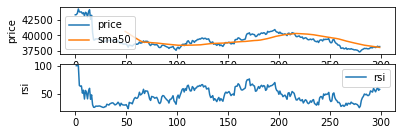

In [16]:
ax1 = plt.subplot(411)
plt.plot(df["close"], label="price")
plt.plot(sma50, label="sma50")
plt.legend()
plt.xlabel('time')
plt.ylabel('price')

plt.subplot(412, sharex=ax1)
plt.plot(rsi, label="rsi")
plt.legend()
plt.ylabel('rsi')

plt.show()